<a href="https://colab.research.google.com/github/hayannn/MeMI_ALFFEL_DATATHON/blob/main/%5Bv3%5Dproject_2_temp.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Google Drive의 MIMIC 데이터 경로
data_path = '/content/drive/MyDrive/mimic-iii-clinical-database-1.4/'
#data_path = '/content/drive/MyDrive/demo/'

# 필요한 데이터 로드
microbiology_events = pd.read_csv(data_path + 'MICROBIOLOGYEVENTS.csv')

In [ ]:
microbiology_events

,ROW_ID,SUBJECT_ID,HADM_ID,CHARTDATE,CHARTTIME,SPEC_ITEMID,SPEC_TYPE_DESC,ORG_ITEMID,ORG_NAME,ISOLATE_NUM,AB_ITEMID,AB_NAME,DILUTION_TEXT,DILUTION_COMPARISON,DILUTION_VALUE,INTERPRETATION
0,744,96,170324,2156-04-13 00:00:00,2156-04-13 14:18:00,70021.0,BRONCHOALVEOLAR LAVAGE,80026.0,PSEUDOMONAS AERUGINOSA,1.0,NaN,NaN,NaN,NaN,NaN,NaN
1,745,96,170324,2156-04-20 00:00:00,2156-04-20 13:10:00,70062.0,SPUTUM,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,746,96,170324,2156-04-20 00:00:00,2156-04-20 16:00:00,70012.0,BLOOD CULTURE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,747,96,170324,2156-04-20 00:00:00,NaN,70012.0,BLOOD CULTURE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,748,96,170324,2156-04-20 00:00:00,NaN,70079.0,URINE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
631721,630931,99783,126090,2125-11-05 00:00:00,2125-11-05 13:15:00,70076.0,TISSUE,80066.0,ASPERGILLUS FUMIGATUS,2.0,NaN,NaN,NaN,NaN,NaN,NaN
631722,630932,99783,126090,2125-11-06 00:00:00,2125-11-06 10:24:00,70076.0,TISSUE,80066.0,ASPERGILLUS FUMIGATUS,1.0,NaN,NaN,NaN,NaN,NaN,NaN
631723,630933,99783,126090,2125-11-06 00:00:00,2125-11-06 10:24:00,70076.0,TISSUE,80066.0,ASPERGILLUS FUMIGATUS,2.0,NaN,NaN,NaN,NaN,NaN,NaN
631724,630934,99783,126090,2125-11-07 00:00:00,2125-11-07 12:40:00,70012.0,BLOOD CULTURE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# 데이터 크기 확인
print(f"microbiology_events: {microbiology_events.shape}")

microbiology_events: (631726, 16)


In [ ]:
microbiology_events['AB_NAME'].unique()

array([nan, 'GENTAMICIN', 'OXACILLIN', 'ERYTHROMYCIN', 'PENICILLIN',
       'LEVOFLOXACIN', 'NITROFURANTOIN', 'PIPERACILLIN/TAZO', 'MEROPENEM',
       'CEFTAZIDIME', 'CEFAZOLIN', 'CEFEPIME', 'TRIMETHOPRIM/SULFA',
       'TOBRAMYCIN', 'IMIPENEM', 'CEFTRIAXONE', 'CIPROFLOXACIN',
       'VANCOMYCIN', 'CLINDAMYCIN', 'TETRACYCLINE', 'RIFAMPIN',
       'CHLORAMPHENICOL', 'AMPICILLIN', 'LINEZOLID', 'PIPERACILLIN',
       'AMPICILLIN/SULBACTAM', 'CEFUROXIME', 'PENICILLIN G', 'DAPTOMYCIN',
       'AMIKACIN', 'CEFPODOXIME'], dtype=object)

# 2nd_중환자실에서의 다제내성균(MDR) 감염 치료 효과 분석

 -  연구대상 : 2개 이상의 항생제에 내성이 있는 다제내성(MDR, multidrug-resistant) 박테리아
 -  질병통제예방센터(CDC)에 따르면 매년 미국에서 항생제 내성균이 약 280만 명의 사람들을 감염시켜 35,000명 사망
 - 이미 항생제에 내성이 있는 박테리아 병원체의 경우, 그 항생제에 대한 장기간 노출로 인해 저항유전자를 유지하는 능력을 증가되었고 병원체가 두 번째 항생제에 대한 내성을 더 쉽게 획득하고 유지하게 되어 MDR 변종 발생

In [ ]:
from google.colab import drive
import pandas as pd
import numpy as np

# Google Drive 마운트
drive.mount('/content/drive')

# 데이터 경로 설정
#data_path = '/content/drive/MyDrive/demo/'  # MIMIC-III 데이터 폴더 경로
data_path = '/content/drive/MyDrive/mimic-iii-clinical-database-1.4/'

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# 필요한 CSV 파일 로드
admissions = pd.read_csv(data_path + 'ADMISSIONS.csv')
diagnoses_icd = pd.read_csv(data_path + 'DIAGNOSES_ICD.csv')
prescriptions = pd.read_csv(data_path + 'PRESCRIPTIONS.csv')
labevents = pd.read_csv(data_path + 'LABEVENTS.csv')
d_labitems = pd.read_csv(data_path + 'D_LABITEMS.csv')

# 데이터 샘플 확인
print(admissions.head())
print('-----------------')
print(diagnoses_icd.head())
print('-----------------')
print(prescriptions.head())
print('-----------------')
print(labevents.head())

<ipython-input-9-99e6a70d3b0f>:4: DtypeWarning: Columns (11) have mixed types. Specify dtype option on import or set low_memory=False.
  prescriptions = pd.read_csv(data_path + 'PRESCRIPTIONS.csv')


   ROW_ID  SUBJECT_ID  HADM_ID            ADMITTIME            DISCHTIME  \
0      21          22   165315  2196-04-09 12:26:00  2196-04-10 15:54:00   
1      22          23   152223  2153-09-03 07:15:00  2153-09-08 19:10:00   
2      23          23   124321  2157-10-18 19:34:00  2157-10-25 14:00:00   
3      24          24   161859  2139-06-06 16:14:00  2139-06-09 12:48:00   
4      25          25   129635  2160-11-02 02:06:00  2160-11-05 14:55:00   

  DEATHTIME ADMISSION_TYPE         ADMISSION_LOCATION  \
0       NaN      EMERGENCY       EMERGENCY ROOM ADMIT   
1       NaN       ELECTIVE  PHYS REFERRAL/NORMAL DELI   
2       NaN      EMERGENCY  TRANSFER FROM HOSP/EXTRAM   
3       NaN      EMERGENCY  TRANSFER FROM HOSP/EXTRAM   
4       NaN      EMERGENCY       EMERGENCY ROOM ADMIT   

          DISCHARGE_LOCATION INSURANCE LANGUAGE           RELIGION  \
0  DISC-TRAN CANCER/CHLDRN H   Private      NaN       UNOBTAINABLE   
1           HOME HEALTH CARE  Medicare      NaN           CA

In [ ]:
print(admissions.shape)
print(diagnoses_icd.shape)
print(prescriptions.shape)
print(labevents.shape)

(58976, 19)
(651047, 5)
(4156450, 19)
(27854055, 9)


> MDR 감염 관련 ICD-9 코드 정의

- 041.04: 반코마이신 내성 장구균(VRE)
- 041.12: 메티실린 내성 황색포도상구균(MRSA)
- 041.19: 기타 내성 세균 감염
- 041.84: 카바페넴 내성 장내세균속균종(CRE)
- 041.03: 반코마이신 내성 황색포도상구균(VRSA)
- 041.6: 항생제 내성 대장균
- 041.7: 항생제 내성 클렙시엘라균

In [ ]:
# MDR 감염 관련 ICD-9 코드
#mdr_icd_codes = ['04112', '04104', '04119', '04184', '04103', '04119', '04111', '0417', '04185', '04186', '48241' ,'48242', '48284', '5990', '03812', '03819', '99591', '99592', '0416', '0417']  # 적절한 ICD-9 코드를 추가
mdr_icd_codes = [
    '04104', '04112', '04119', '04184', '04103',
    '0416', '0417'
]

# MDR 감염 환자 필터링
mdr_patients = diagnoses_icd[diagnoses_icd['ICD9_CODE'].isin(mdr_icd_codes)]

# 필요한 환자 정보 추출
mdr_subject_ids = mdr_patients['SUBJECT_ID'].unique()
print(f"MDR 감염 환자 수: {len(mdr_subject_ids)}")

MDR 감염 환자 수: 1567


mdr_patients['SUBJECT_ID'].unique()값과 차이발생 => 같은 환자가 여러번 처방받는 case 확인필요

solution?

In [ ]:
mdr_patients

,ROW_ID,SUBJECT_ID,HADM_ID,SEQ_NUM,ICD9_CODE
1334,1223,109,158943,22.0,04104
1336,1225,109,158943,24.0,04112
1748,2306,188,132401,22.0,04119
1783,2341,188,164735,15.0,04104
2363,2030,161,121804,13.0,04104
...,...,...,...,...,...
649168,650614,99894,127380,7.0,04104
649516,650707,99901,131711,24.0,04104
649604,650795,99934,176121,8.0,04104
649682,650873,99946,157197,6.0,0416


In [ ]:
#prescriptions 테이블에서 mdr_subject_ids와 일치하는 항생제 데이터를 추출
mdr_prescriptions = prescriptions[prescriptions['SUBJECT_ID'].isin(mdr_subject_ids)]
print(f"MDR 감염 환자의 약물 처방 데이터 수: {mdr_prescriptions.shape}")

# 항생제 목록
target_antibiotics = [
    'GENTAMICIN', 'OXACILLIN', 'ERYTHROMYCIN', 'PENICILLIN', 'LEVOFLOXACIN',
    'NITROFURANTOIN', 'PIPERACILLIN/TAZO', 'MEROPENEM', 'CEFTAZIDIME',
    'CEFAZOLIN', 'CEFEPIME', 'TRIMETHOPRIM/SULFA', 'TOBRAMYCIN', 'IMIPENEM',
    'CEFTRIAXONE', 'CIPROFLOXACIN', 'VANCOMYCIN', 'CLINDAMYCIN', 'TETRACYCLINE',
    'RIFAMPIN', 'CHLORAMPHENICOL', 'AMPICILLIN', 'LINEZOLID', 'PIPERACILLIN',
    'AMPICILLIN/SULBACTAM', 'CEFUROXIME', 'PENICILLIN G', 'DAPTOMYCIN',
    'AMIKACIN', 'CEFPODOXIME'
]

# PRESCRIPTIONS 테이블에서 항생제 필터링
mdr_antibiotics = mdr_prescriptions[
    mdr_prescriptions['DRUG_NAME_GENERIC'].str.upper().isin(target_antibiotics)
]

# 필터링된 데이터 확인
print(f"필터링된 항생제 데이터 수: {mdr_antibiotics.shape[0]}")
mdr_antibiotics.head()


MDR 감염 환자의 항생제 처방 데이터 수: (410015, 19)
필터링된 항생제 데이터 수: 1318


,ROW_ID,SUBJECT_ID,HADM_ID,ICUSTAY_ID,STARTDATE,ENDDATE,DRUG_TYPE,DRUG,DRUG_NAME_POE,DRUG_NAME_GENERIC,FORMULARY_DRUG_CD,GSN,NDC,PROD_STRENGTH,DOSE_VAL_RX,DOSE_UNIT_RX,FORM_VAL_DISP,FORM_UNIT_DISP,ROUTE
6361,1837814,109,196721,214027.0,2142-07-13 00:00:00,2142-07-14 00:00:00,MAIN,Levofloxacin,Levofloxacin,Levofloxacin,LEV250,029927,45152010.0,250mg Tablet,250,mg,1,TAB,PO
7281,1830622,109,172335,262652.0,2141-09-21 00:00:00,2141-09-23 00:00:00,MAIN,Levofloxacin,Levofloxacin,Levofloxacin,LEV250,029927,45152010.0,250mg Tablet,250,mg,1,TAB,PO
9198,1835615,109,125288,257134.0,2141-11-19 00:00:00,2141-11-20 00:00:00,MAIN,Levofloxacin,Levofloxacin,Levofloxacin,LEV250,029927,45152010.0,250mg Tablet,250,mg,1,TAB,PO
14908,2091540,188,132401,NaN,2161-12-25 00:00:00,2162-01-08 00:00:00,MAIN,Linezolid,Linezolid,Linezolid,LINE600,045131,9513503.0,600mg Tablet,600,mg,1,TAB,PO/NG
15384,2095905,188,191517,278679.0,2157-03-09 00:00:00,2157-03-10 00:00:00,MAIN,Levofloxacin,Levofloxacin,Levofloxacin,LEV500,029928,45152510.0,500mg Tablet,500,mg,1,TAB,PO


In [ ]:
# DRUG 열의 고유값
print(mdr_antibiotics['DRUG'].unique())

# DRUG_NAME_GENERIC 열의 고유값
print(mdr_antibiotics['DRUG_NAME_GENERIC'].unique())

['Levofloxacin' 'Linezolid' 'Erythromycin' 'Rifampin' 'Ampicillin'
 'Clindamycin' 'Ceftriaxone' 'CeftriaXONE' 'Cefuroxime' 'Tetracycline HCl'
 'Cefepime' 'Cefazolin' 'LevoFLOXacin' 'CefazoLIN' 'CefePIME' 'Vancomycin']
['LEVOFLOXACIN' 'LINEZOLID' 'ERYTHROMYCIN' 'RIFAMPIN' 'AMPICILLIN'
 'CLINDAMYCIN' 'CEFTRIAXONE' 'CEFUROXIME' 'TETRACYCLINE' 'CEFEPIME'
 'CEFAZOLIN' 'VANCOMYCIN']


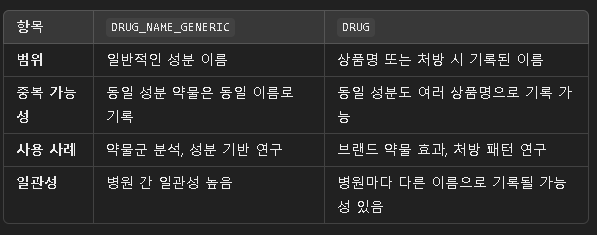

# [**치료효과분석**]
목적 : 항생제 사용이 감염 치료 성공 여부에 미치는 영향을 평가

In [ ]:
#MDR 감염 환자의 LABEL만 추출


# MDR 감염 환자의 SUBJECT_ID를 기반으로 LABEVENTS 필터링
mdr_labevents = labevents[labevents['SUBJECT_ID'].isin(mdr_prescriptions['SUBJECT_ID'].unique())]

# 필터링된 LABEVENTS 데이터에서 ITEMID 추출
mdr_item_ids = mdr_labevents['ITEMID'].unique()

# D_LABITEMS 테이블에서 해당 ITEMID에 매핑된 LABEL 확인
mdr_labels = d_labitems[d_labitems['ITEMID'].isin(mdr_item_ids)]
print(f"총 라벨 개수: {mdr_labels.shape[0]}")
print(mdr_labels[['ITEMID', 'LABEL']].head(40))  # 상위 20개 라벨 출력


총 라벨 개수: 637
    ITEMID                          LABEL
0    51346                         Blasts
1    51347                    Eosinophils
2    51348                Hematocrit, CSF
4    51350              Immunophenotyping
5    51351                         Lymphs
6    51352                     Macrophage
7    51353              Mesothelial cells
8    51354                 Metamyelocytes
9    51355                      Monocytes
11   51357                           NRBC
12   51358                          Other
13   51359                         Plasma
14   51360                          Polys
16   51362                       RBC, CSF
17   51363                       WBC, CSF
18   51364                          Young
19   51365           Atypical Lymphocytes
20   51366                          Bands
21   51367                      Basophils
22   51368                    Eosinophils
23   51369        Hematocrit, Joint Fluid
24   51370  Joint Crystals, Birefringence
26   51372       Join

 - MDR 감염 환자와 관련된 총 637개의 라벨(LABEL) 중 일부를 확인

 -  출력 결과를 보면, 감염과 직접적으로 관련 있는 지표(CRP, WBC 등) 외에도 다양한 라벨이 포함
  - 분석에 필요한 감염 관련 지표만 선별





In [ ]:
mdr_labels

,ROW_ID,ITEMID,LABEL,FLUID,CATEGORY,LOINC_CODE
0,546,51346,Blasts,Cerebrospinal Fluid (CSF),Hematology,26447-3
1,547,51347,Eosinophils,Cerebrospinal Fluid (CSF),Hematology,26451-5
2,548,51348,"Hematocrit, CSF",Cerebrospinal Fluid (CSF),Hematology,30398-2
4,550,51350,Immunophenotyping,Cerebrospinal Fluid (CSF),Hematology,NaN
5,551,51351,Lymphs,Cerebrospinal Fluid (CSF),Hematology,26479-6
...,...,...,...,...,...,...
717,718,51518,WBC Clumps,Urine,Hematology,NaN
718,719,51519,Yeast,Urine,Hematology,5822-2
722,723,51523,GR HOLD,URINE,CHEMISTRY,NaN
728,729,51529,Estimated Actual Glucose,BLOOD,CHEMISTRY,NaN


In [ ]:
#filtering_try_1 : 더 구체적인 필터링 키워드
infection_keywords = [
    'C-Reactive', 'WBC', 'Bands', 'Neutrophils', 'CRP',
    'Hematocrit', 'Hemoglobin', 'Platelet', 'RBC', 'Lactate', 'Procalcitonin'
]

# LABEL 필터링
filtered_labels = mdr_labels[
    mdr_labels['LABEL'].str.contains('|'.join(infection_keywords), case=False, na=False)
]

print(f"감염 관련 라벨 수: {filtered_labels.shape[0]}")
print(filtered_labels[['ITEMID', 'LABEL']])


감염 관련 라벨 수: 56
     ITEMID                           LABEL
2     51348                 Hematocrit, CSF
11    51357                            NRBC
16    51362                        RBC, CSF
17    51363                        WBC, CSF
20    51366                           Bands
23    51369         Hematocrit, Joint Fluid
37    51383                RBC, Joint Fluid
38    51384                WBC, Joint Fluid
40    51386                           Bands
76    51422         Hematocrit, Other Fluid
87    51433                            NRBC
92    51438                RBC, Other Fluid
93    51439                WBC, Other Fluid
95    51441                           Bands
99    51445             Hematocrit, Pleural
106   51452                            NRBC
111   51457                    RBC, Pleural
112   51458                    WBC, Pleural
132   50805               Carboxyhemoglobin
137   50810          Hematocrit, Calculated
138   50811                      Hemoglobin
140   50813      

In [ ]:
#filtering_try_2 : FLUID 및 CATEGORY 기반 필터링
relevant_fluids = ['Blood', 'CSF', 'Urine']
relevant_categories = ['Hematology', 'Chemistry', 'Microbiology']

filtered_labels = mdr_labels[
    (mdr_labels['FLUID'].isin(relevant_fluids)) &
    (mdr_labels['CATEGORY'].isin(relevant_categories)) &
    (mdr_labels['LABEL'].str.contains('|'.join(infection_keywords), case=False, na=False))
]

print(f"FLUID 및 CATEGORY 기반 필터링 후 라벨 수: {filtered_labels.shape[0]}")

FLUID 및 CATEGORY 기반 필터링 후 라벨 수: 23


In [ ]:
filtered_labels

,ROW_ID,ITEMID,LABEL,FLUID,CATEGORY,LOINC_CODE
179,53,50852,% Hemoglobin A1c,Blood,Chemistry,4548-4
182,56,50855,Absolute Hemoglobin,Blood,Chemistry,718-7
216,90,50889,C-Reactive Protein,Blood,Chemistry,1988-5
281,155,50954,Lactate Dehydrogenase (LD),Blood,Chemistry,2532-0
470,344,51144,Bands,Blood,Hematology,763-3
547,421,51221,Hematocrit,Blood,Hematology,4544-3
548,422,51222,Hemoglobin,Blood,Hematology,718-7
549,423,51223,Hemoglobin A2,Blood,Hematology,4552-6
550,424,51224,Hemoglobin C,Blood,Hematology,4561-7
551,425,51225,Hemoglobin F,Blood,Hematology,9749-3


 - 세부적으로 필터링을 진행하였음에도 불구하고, 관련없는 지표 남아있음

 1) 감염지표와 관련있는 항목
  - 염증/면역 반응
    - CRP (C-Reactive Protein)
    - WBC (White Blood Cell Count)
    - Bands (미성숙 백혈구)
    - Neutrophils (중성구)
  - 혈액 상태
    - Platelet Count (혈소판 수치)
    - Lactate (조직 저산소증 및 패혈증 평가)

 2) 감염과 관련 없는 항목(감염과 직접적 연관성 낮음)
  - % Hemoglobin A1c : 당뇨병 관리 지표로, 감염 상태를 직접 평가하지 않음
  - Absolute Hemoglobin, Hemoglobin A2/C/F : 헤모글로빈 수치는 빈혈 상태나 산소운반 능력을 평가하는 데 사용되지만, 감염과 직접적으로 관련되지 않음.
  - Large Platelets, Platelet Clumps, Platelet Smear :
혈소판의 크기나 상태를 나타내며, 주로 혈액 응고 문제를 평가.
  - RBC, RBC Casts, RBC Clumps :
소변 검사에서 적혈구 관련 항목은 요로감염이나 신장 질환을 나타낼 수 있지만, 전신 감염 상태를 직접적으로 평가하지는 않음.

In [ ]:
# 감염 지표로 유효한 항목의 ITEMID 필터링
infection_related_itemids = [
    50889,  # C-Reactive Protein
    51300,  # WBC Count
    51144,  # Bands
    51256,  # Neutrophils
    51265,  # Platelet Count
    50954   # Lactate
]

filtered_labevents = labevents[labevents['ITEMID'].isin(infection_related_itemids)]
print(f"감염 관련 라벨 수: {filtered_labevents.shape[0]}")

In [ ]:
filtered_labevents

,ROW_ID,SUBJECT_ID,HADM_ID,ITEMID,CHARTTIME,VALUE,VALUENUM,VALUEUOM,FLAG
63,344,3,NaN,51256,2101-10-14 03:00:00,77.6,77.6,%,abnormal
64,345,3,NaN,51265,2101-10-14 03:00:00,184,184.0,K/uL,NaN
98,379,3,NaN,51265,2101-10-15 03:30:00,191,191.0,K/uL,NaN
133,414,3,NaN,51265,2101-10-16 04:00:00,213,213.0,K/uL,NaN
201,958,3,145834.0,51256,2101-10-22 04:00:00,80.7,80.7,%,abnormal
...,...,...,...,...,...,...,...,...,...
27853897,27764184,98994,178949.0,50954,2137-09-25 04:29:00,205,205.0,IU/L,NaN
27853922,27427170,96442,107499.0,50954,2115-05-27 04:47:00,425,425.0,IU/L,abnormal
27853935,27427183,96442,107499.0,51265,2115-05-27 04:47:00,451,451.0,K/uL,abnormal
27853962,27427210,96442,107499.0,51265,2115-05-28 04:38:00,489,489.0,K/uL,abnormal


In [ ]:
# ITEMID=51265(Platelet Count)의 값 변화 추적
platelet_data = labevents[labevents['ITEMID'] == 51265]
platelet_data = platelet_data.sort_values(by=['SUBJECT_ID', 'CHARTTIME'])
print(platelet_data[['SUBJECT_ID', 'CHARTTIME', 'VALUENUM', 'FLAG']])


          SUBJECT_ID            CHARTTIME  VALUENUM      FLAG
609                2  2138-07-17 20:48:00       5.0  abnormal
632                2  2138-07-17 21:10:00     302.0       NaN
664                3  2101-10-04 15:24:00     261.0       NaN
688                3  2101-10-05 06:00:00     246.0       NaN
707                3  2101-10-06 05:45:00     301.0       NaN
...              ...                  ...       ...       ...
27705428       99995  2147-02-09 02:31:00     166.0       NaN
27705481       99995  2147-02-10 01:05:00     124.0  abnormal
27649107       99999  2117-12-31 07:10:00     252.0       NaN
27649138       99999  2118-01-01 05:35:00     182.0       NaN
27743290       99999  2118-01-02 05:30:00     193.0       NaN

[778365 rows x 4 columns]


In [ ]:
# FLAG가 abnormal인 데이터 필터링
abnormal_data = labevents[labevents['FLAG'] == 'abnormal']
print(abnormal_data[['SUBJECT_ID', 'ITEMID', 'CHARTTIME', 'VALUENUM', 'VALUEUOM', 'FLAG']])

          SUBJECT_ID  ITEMID            CHARTTIME  VALUENUM VALUEUOM      FLAG
4                  3   50808  2101-10-12 18:17:00      0.93   mmol/L  abnormal
15                 3   50912  2101-10-13 03:00:00      1.70    mg/dL  abnormal
16                 3   50931  2101-10-13 03:00:00    137.00    mg/dL  abnormal
21                 3   51006  2101-10-13 03:00:00     33.00    mg/dL  abnormal
22                 3   51009  2101-10-13 03:00:00     16.80    ug/mL  abnormal
...              ...     ...                  ...       ...      ...       ...
27854045       96443   50862  2109-12-30 01:40:00      2.20     g/dL  abnormal
27854046       96443   50863  2109-12-30 01:40:00    172.00     IU/L  abnormal
27854049       96443   50878  2109-12-30 01:40:00    467.00     IU/L  abnormal
27854051       96443   50885  2109-12-30 01:40:00      2.10    mg/dL  abnormal
27854054       96443   50912  2109-12-30 01:40:00      1.60    mg/dL  abnormal

[9779594 rows x 6 columns]


**시간에 따른 치료 효과 분석**
 - 감염 지표(CRP, WBC, Platelet Count 등)가 시간이 지남에 따라 정상화되는지 분석

In [ ]:
# ITEMID가 필요한 데이터로 필터링
# 치료 효과 분석: 초기값과 최종값 비교
def calculate_change(group):
    initial = group.iloc[0]['VALUENUM']
    final = group.iloc[-1]['VALUENUM']

    return pd.Series({'INITIAL_VALUE': initial, 'FINAL_VALUE': final, 'CHANGE': final - initial})

filtered_labevents = labevents[labevents['ITEMID'].isin(infection_related_itemids)]
changes = filtered_labevents.groupby(['SUBJECT_ID', 'ITEMID']).apply(calculate_change).reset_index()
print(changes.head())

   SUBJECT_ID  ITEMID  INITIAL_VALUE  FINAL_VALUE  CHANGE
0           2   51144            0.0          1.0     1.0
1           2   51256          100.0         70.0   -30.0
2           2   51265            5.0        302.0   297.0
3           3   51144            2.0          0.0    -2.0
4           3   51256           77.6         76.9    -0.7


<ipython-input-23-98dd9d688d87>:9: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  changes = filtered_labevents.groupby(['SUBJECT_ID', 'ITEMID']).apply(calculate_change).reset_index()


In [ ]:
'''
#시간 오래걸려서 끊김...
# 치료 효과 분석: 초기값과 최종값 비교
def calculate_change(group):
    initial = group.iloc[0]['VALUENUM']
    final = group.iloc[-1]['VALUENUM']
    return pd.Series({'INITIAL_VALUE': initial, 'FINAL_VALUE': final, 'CHANGE': final - initial})

# ITEMID별 변화 추적
changes = labevents.groupby(['SUBJECT_ID', 'ITEMID']).apply(calculate_change).reset_index()
print(changes.head())
'''

"\n#시간 오래걸려서 끊김...\n# 치료 효과 분석: 초기값과 최종값 비교\ndef calculate_change(group):\n    initial = group.iloc[0]['VALUENUM']\n    final = group.iloc[-1]['VALUENUM']\n    return pd.Series({'INITIAL_VALUE': initial, 'FINAL_VALUE': final, 'CHANGE': final - initial})\n\n# ITEMID별 변화 추적\nchanges = labevents.groupby(['SUBJECT_ID', 'ITEMID']).apply(calculate_change).reset_index()\nprint(changes.head())\n"

** 항목별 치료 성공 기준**
  - C-Reactive Protein (CRP) ; < 10 mg/L
  - WBC Count : 4–11 × 10⁹/L
  - Bands : < 5%
  - Neutrophils : 40–70%
  - Platelet Count : 150–450 K/uL  
  - Lactate : < 2 mmol/L (중증 감염 시 중요)

In [ ]:
# 성공 기준 정의
success_criteria = {
    50889: lambda x: x < 10,         # CRP
    51300: lambda x: 4 <= x <= 11,  # WBC Count
    51144: lambda x: x < 5,         # Bands
    51256: lambda x: 40 <= x <= 70, # Neutrophils
    51265: lambda x: 150 <= x <= 450,  # Platelet Count
    50954: lambda x: x < 2          # Lactate
}

# 성공 여부 추가
changes['SUCCESS'] = changes.apply(
    lambda row: success_criteria[row['ITEMID']](row['FINAL_VALUE']) if row['ITEMID'] in success_criteria else False,
    axis=1
)

print(changes[['SUBJECT_ID', 'ITEMID', 'INITIAL_VALUE', 'FINAL_VALUE', 'SUCCESS']])


        SUBJECT_ID  ITEMID  INITIAL_VALUE  FINAL_VALUE  SUCCESS
0                2   51144            0.0          1.0     True
1                2   51256          100.0         70.0     True
2                2   51265            5.0        302.0     True
3                3   51144            2.0          0.0     True
4                3   51256           77.6         76.9    False
...            ...     ...            ...          ...      ...
131933       99992   51256           84.9         84.9    False
131934       99992   51265          188.0        132.0    False
131935       99995   50954          260.0        260.0    False
131936       99995   51265          166.0        189.0     True
131937       99999   51265          252.0        193.0     True

[131938 rows x 5 columns]


In [ ]:
final_results = changes.groupby('SUBJECT_ID')['SUCCESS'].all().reset_index()
print(final_results)

       SUBJECT_ID  SUCCESS
0               2     True
1               3    False
2               4    False
3               5    False
4               6    False
...           ...      ...
45336       99985    False
45337       99991    False
45338       99992    False
45339       99995    False
45340       99999     True

[45341 rows x 2 columns]


In [ ]:
# ADMISSIONS에서 생존 여부 가져오기
admissions_filtered = admissions[['SUBJECT_ID', 'HOSPITAL_EXPIRE_FLAG']]

# 생존 여부 추가
admissions_filtered['SURVIVAL'] = admissions_filtered['HOSPITAL_EXPIRE_FLAG'] == 0

<ipython-input-27-015b07296aab>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  admissions_filtered['SURVIVAL'] = admissions_filtered['HOSPITAL_EXPIRE_FLAG'] == 0


In [ ]:
final_results = final_results.merge(admissions_filtered, on='SUBJECT_ID')
print(final_results[['SUBJECT_ID', 'SUCCESS', 'SURVIVAL']])

       SUBJECT_ID  SUCCESS  SURVIVAL
0               2     True      True
1               3    False      True
2               4    False      True
3               5    False      True
4               6    False      True
...           ...      ...       ...
57760       99985    False      True
57761       99991    False      True
57762       99992    False      True
57763       99995    False      True
57764       99999     True      True

[57765 rows x 3 columns]


/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 52824 (\N{HANGUL SYLLABLE CI}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 47308 (\N{HANGUL SYLLABLE RYO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 49457 (\N{HANGUL SYLLABLE SEONG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 44277 (\N{HANGUL SYLLABLE GONG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 50668 (\N{HANGUL SYLLABLE YEO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-package

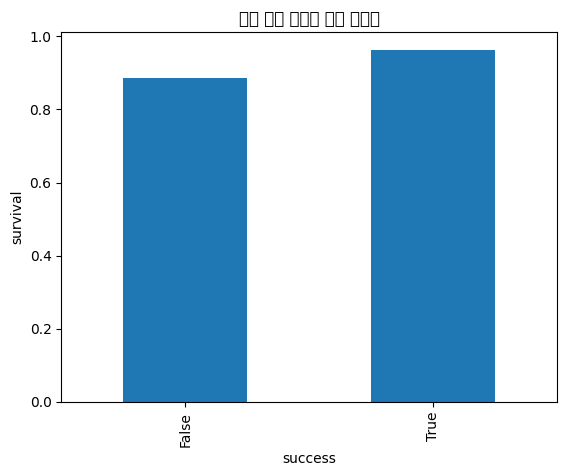

In [ ]:
import matplotlib.pyplot as plt

# 생존율 요약 데이터
survival_summary = final_results.groupby('SUCCESS')['SURVIVAL'].mean()

# 그래프 그리기
survival_summary.plot(kind='bar')
plt.title("치료 성공 여부에 따른 생존율")
plt.xlabel("success")
plt.ylabel("survival")
plt.show()

X축: 치료 성공 여부(SUCCESS)

 - False: 치료가 성공하지 않은 경우.
 - True: 치료가 성공한 경우

Y축: 생존율(SURVIVAL)

 - 축 값은 치료 성공 여부에 따른 생존율의 평균값
 - 값의 범위는 0에서 1 사이이며, 1은 모든 환자가 생존했음을 의미합니다.

**그래프에서 관찰된 점**

1) SUCCESS = True에서 높은 생존율:

치료가 성공한 환자의 생존율이 매우 높습니다. 이는 치료 성공 여부가 생존에 긍정적인 영향을 미친다는 것을 암시합니다.

2) SUCCESS = False에서도 높은 생존율:

치료가 성공하지 못했음에도 불구하고 생존율이 비교적 높습니다.
이는 치료 실패가 항상 사망으로 이어지는 것은 아니며, 다른 요인(예: 추가적인 치료, 환자의 기저 상태 등)이 생존에 기여할 수 있음을 시사합니다.

In [ ]:
# 필요한 라이브러리 임포트
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# 데이터 준비 (LABEVENTS + ADMISSIONS 결합)
features = changes.merge(admissions_filtered, on='SUBJECT_ID')

# 입력(features)와 출력(target) 설정
X = features[['INITIAL_VALUE', 'FINAL_VALUE', 'CHANGE']]  # 주요 감염 지표 값
y = features['SURVIVAL']  # 생존 여부

# 학습 데이터와 테스트 데이터 분리
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
# 결측값 제거
X_train = X_train.dropna()
y_train = y_train.loc[X_train.index]  # y_train도 같은 인덱스에서 제거
X_test = X_test.dropna()
y_test = y_test.loc[X_test.index]


In [ ]:
# 로지스틱 회귀 모델 학습
lr_model = LogisticRegression(random_state=42)
lr_model.fit(X_train, y_train)

# 예측
y_pred_lr = lr_model.predict(X_test)

# 성능 평가
from sklearn.metrics import accuracy_score, classification_report
print("Accuracy:", accuracy_score(y_test, y_pred_lr))
print(classification_report(y_test, y_pred_lr))


Accuracy: 0.890005008625967
              precision    recall  f1-score   support

       False       0.64      0.01      0.01      3962
        True       0.89      1.00      0.94     31976

    accuracy                           0.89     35938
   macro avg       0.76      0.50      0.48     35938
weighted avg       0.86      0.89      0.84     35938



In [ ]:
# Random Forest 모델 학습
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

# 예측
y_pred = rf_model.predict(X_test)

# 성능 평가
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


Accuracy: 0.8691913851633368
              precision    recall  f1-score   support

       False       0.17      0.05      0.08      3962
        True       0.89      0.97      0.93     31976

    accuracy                           0.87     35938
   macro avg       0.53      0.51      0.50     35938
weighted avg       0.81      0.87      0.84     35938



1. 데이터의 주요 통계 확인

  1) 감염 지표와 치료 성공 여부의 관계
   - 감염 지표(CRP, WBC 등)의 초기값(INITIAL_VALUE), 최종값(FINAL_VALUE), 변화량(CHANGE)이 치료 성공 여부(SUCCESS)에 미치는 영향을 확인합니다.


In [ ]:
# SUCCESS에 따른 주요 감염 지표의 평균값 확인
success_group = features.groupby('SUCCESS')[['INITIAL_VALUE', 'FINAL_VALUE', 'CHANGE']].mean()
print("SUCCESS 여부에 따른 감염 지표 평균값:\n", success_group)

SUCCESS 여부에 따른 감염 지표 평균값:
          INITIAL_VALUE  FINAL_VALUE    CHANGE
SUCCESS                                      
False       194.344707   197.236796  2.320453
True        137.718170   138.117508  0.408992


/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 44048 (\N{HANGUL SYLLABLE GAM}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 50684 (\N{HANGUL SYLLABLE YEOM}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 51648 (\N{HANGUL SYLLABLE JI}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 54364 (\N{HANGUL SYLLABLE PYO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 48320 (\N{HANGUL SYLLABLE BYEON}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-package

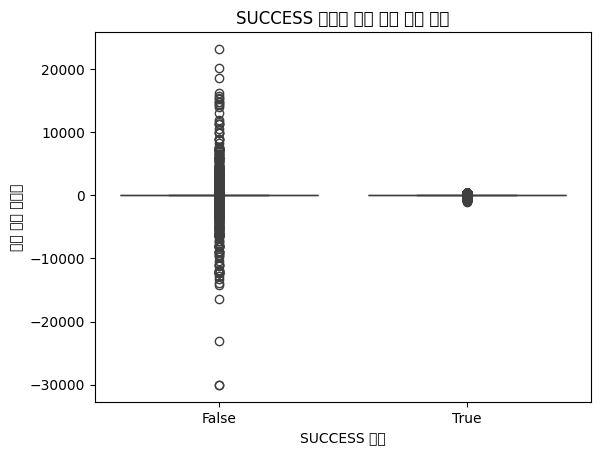

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# SUCCESS 여부에 따른 감염 지표 변화 시각화
sns.boxplot(x='SUCCESS', y='CHANGE', data=features)
plt.title("SUCCESS 여부에 따른 감염 지표 변화")
plt.xlabel("SUCCESS 여부")
plt.ylabel("감염 지표 변화량")
plt.show()


2. 치료 성공 여부와 생존률의 상관 관계

 - 2.1. 치료 성공 여부에 따른 생존률 확인

In [ ]:
# SUCCESS에 따른 생존률 평균값 확인
success_survival_rate = features.groupby('SUCCESS')['SURVIVAL'].mean()
print("SUCCESS 여부에 따른 생존률:\n", success_survival_rate)


SUCCESS 여부에 따른 생존률:
 SUCCESS
False    0.864944
True     0.918334
Name: SURVIVAL, dtype: float64


/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 49373 (\N{HANGUL SYLLABLE SAENG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 51316 (\N{HANGUL SYLLABLE JON}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 47456 (\N{HANGUL SYLLABLE RYUL}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 50668 (\N{HANGUL SYLLABLE YEO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 48512 (\N{HANGUL SYLLABLE BU}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-package

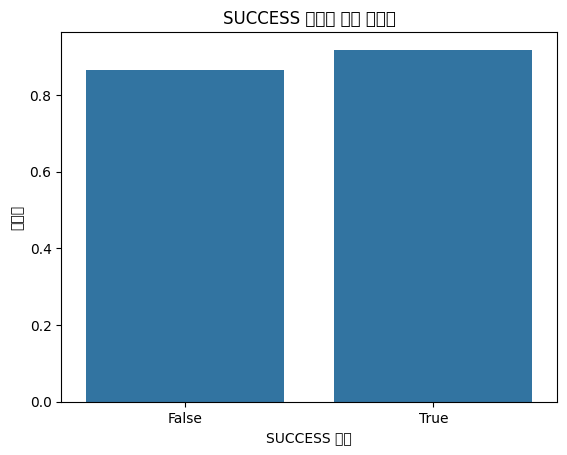

In [ ]:
# SUCCESS 여부에 따른 생존률 시각화
sns.barplot(x=success_survival_rate.index, y=success_survival_rate.values)
plt.title("SUCCESS 여부에 따른 생존률")
plt.xlabel("SUCCESS 여부")
plt.ylabel("생존률")
plt.show()


3. 항생제 사용과 치료 성공 여부의 관계
 - 3.1. 항생제 사용 빈도 확인

    특정 항생제(예: VANCOMYCIN, PIPERACILLIN 등)의 사용이 치료 성공에 미치는 영향을 확인.

In [ ]:
# 필터링된 데이터 확인
print(mdr_antibiotics.head())
print(mdr_antibiotics['DRUG_NAME_GENERIC'].unique())


        ROW_ID  SUBJECT_ID  HADM_ID  ICUSTAY_ID            STARTDATE  \
6361   1837814         109   196721    214027.0  2142-07-13 00:00:00   
7281   1830622         109   172335    262652.0  2141-09-21 00:00:00   
9198   1835615         109   125288    257134.0  2141-11-19 00:00:00   
14908  2091540         188   132401         NaN  2161-12-25 00:00:00   
15384  2095905         188   191517    278679.0  2157-03-09 00:00:00   

                   ENDDATE DRUG_TYPE          DRUG DRUG_NAME_POE  \
6361   2142-07-14 00:00:00      MAIN  Levofloxacin  Levofloxacin   
7281   2141-09-23 00:00:00      MAIN  Levofloxacin  Levofloxacin   
9198   2141-11-20 00:00:00      MAIN  Levofloxacin  Levofloxacin   
14908  2162-01-08 00:00:00      MAIN     Linezolid     Linezolid   
15384  2157-03-10 00:00:00      MAIN  Levofloxacin  Levofloxacin   

      DRUG_NAME_GENERIC FORMULARY_DRUG_CD     GSN         NDC PROD_STRENGTH  \
6361       Levofloxacin            LEV250  029927  45152010.0  250mg Tablet   


In [ ]:
# DRUG_NAME_GENERIC 필드 대문자로 통일
mdr_antibiotics['DRUG_NAME_GENERIC'] = mdr_antibiotics['DRUG_NAME_GENERIC'].str.upper()
print(mdr_antibiotics['DRUG_NAME_GENERIC'].unique())


['LEVOFLOXACIN' 'LINEZOLID' 'ERYTHROMYCIN' 'RIFAMPIN' 'AMPICILLIN'
 'CLINDAMYCIN' 'CEFTRIAXONE' 'CEFUROXIME' 'TETRACYCLINE' 'CEFEPIME'
 'CEFAZOLIN' 'VANCOMYCIN']


<ipython-input-46-e22d5ebc5d54>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mdr_antibiotics['DRUG_NAME_GENERIC'] = mdr_antibiotics['DRUG_NAME_GENERIC'].str.upper()


In [ ]:
target_antibiotics

['AMPICILLIN',
 'CEFAZOLIN',
 'CEFEPIME',
 'CEFTRIAXONE',
 'CEFUROXIME',
 'CLINDAMYCIN',
 'ERYTHROMYCIN',
 'LEVOFLOXACIN',
 'LINEZOLID',
 'RIFAMPIN']

In [ ]:
# 필터링된 항생제 목록
filtered_antibiotics = mdr_antibiotics[
    mdr_antibiotics['DRUG_NAME_GENERIC'].isin(target_antibiotics)
]
print(filtered_antibiotics['DRUG_NAME_GENERIC'].unique())

['LEVOFLOXACIN' 'LINEZOLID' 'ERYTHROMYCIN' 'RIFAMPIN' 'AMPICILLIN'
 'CLINDAMYCIN' 'CEFTRIAXONE' 'CEFUROXIME' 'TETRACYCLINE' 'CEFEPIME'
 'CEFAZOLIN' 'VANCOMYCIN']


In [ ]:
# features 데이터프레임에 항생제 정보 병합
featur_antibiotics[['SUBJECT_ID', 'DRUG_NAME_GENERIC']],
    on='SUBJECT_IDes = features.merge(
    filtered',
    how='left'
)

# 항생제 사용 빈도 계산
antibiotic_usage = features.groupby(['SUCCESS', 'DRUG_NAME_GENERIC']).size().unstack(fill_value=0)
print("SUCCESS 여부에 따른 항생제 사용 빈도:\n", antibiotic_usage)


SUCCESS 여부에 따른 항생제 사용 빈도:
 DRUG_NAME_GENERIC  AMPICILLIN  CEFAZOLIN  CEFEPIME  CEFTRIAXONE  CEFUROXIME  \
SUCCESS                                                                       
False                     418          6        17           44          21   
True                      265          5         6           35           7   

DRUG_NAME_GENERIC  CLINDAMYCIN  ERYTHROMYCIN  LEVOFLOXACIN  LINEZOLID  \
SUCCESS                                                                 
False                      135           928         10674       3264   
True                        91          1432          6881       2097   

DRUG_NAME_GENERIC  RIFAMPIN  TETRACYCLINE  VANCOMYCIN  
SUCCESS                                                
False                   402            13           9  
True                    194            11           3  


In [ ]:
# 새롭게 선정된 항생제 목록
target_antibiotics = [
    'AMPICILLIN', 'CEFAZOLIN', 'CEFEPIME', 'CEFTRIAXONE', 'CEFUROXIME',
    'CLINDAMYCIN', 'ERYTHROMYCIN', 'LEVOFLOXACIN', 'LINEZOLID', 'RIFAMPIN'
]
print(target_antibiotics)


['AMPICILLIN', 'CEFAZOLIN', 'CEFEPIME', 'CEFTRIAXONE', 'CEFUROXIME', 'CLINDAMYCIN', 'ERYTHROMYCIN', 'LEVOFLOXACIN', 'LINEZOLID', 'RIFAMPIN']


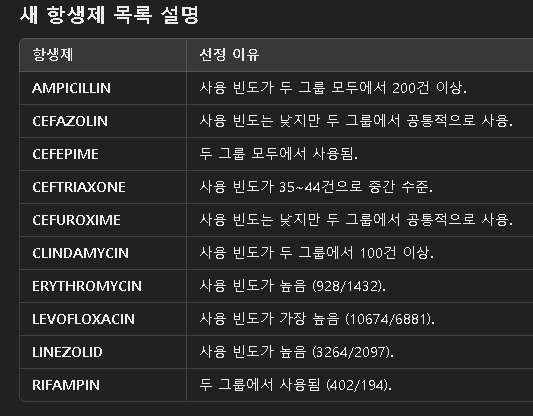

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 49324 (\N{HANGUL SYLLABLE SA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 50857 (\N{HANGUL SYLLABLE YONG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 48712 (\N{HANGUL SYLLABLE BIN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 46020 (\N{HANGUL SYLLABLE DO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 50668 (\N{HANGUL SYLLABLE YEO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/I

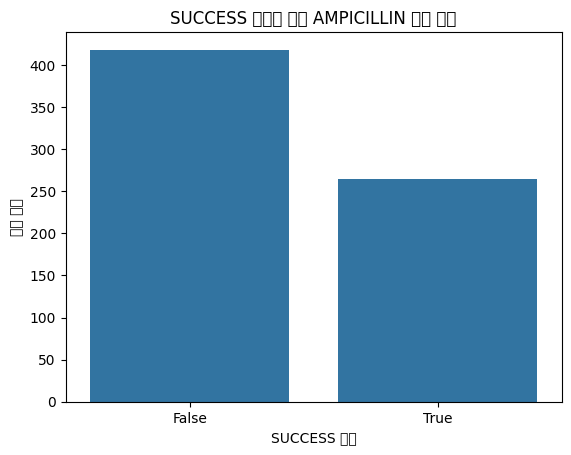

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 49324 (\N{HANGUL SYLLABLE SA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 50857 (\N{HANGUL SYLLABLE YONG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 48712 (\N{HANGUL SYLLABLE BIN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 46020 (\N{HANGUL SYLLABLE DO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 50668 (\N{HANGUL SYLLABLE YEO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/I

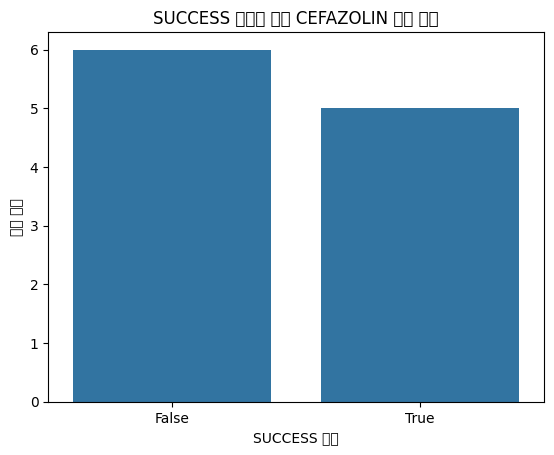

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 49324 (\N{HANGUL SYLLABLE SA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 50857 (\N{HANGUL SYLLABLE YONG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 48712 (\N{HANGUL SYLLABLE BIN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 46020 (\N{HANGUL SYLLABLE DO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 50668 (\N{HANGUL SYLLABLE YEO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/I

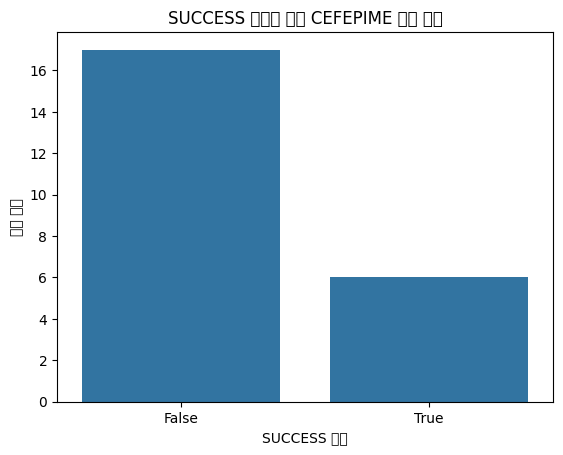

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 49324 (\N{HANGUL SYLLABLE SA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 50857 (\N{HANGUL SYLLABLE YONG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 48712 (\N{HANGUL SYLLABLE BIN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 46020 (\N{HANGUL SYLLABLE DO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 50668 (\N{HANGUL SYLLABLE YEO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/I

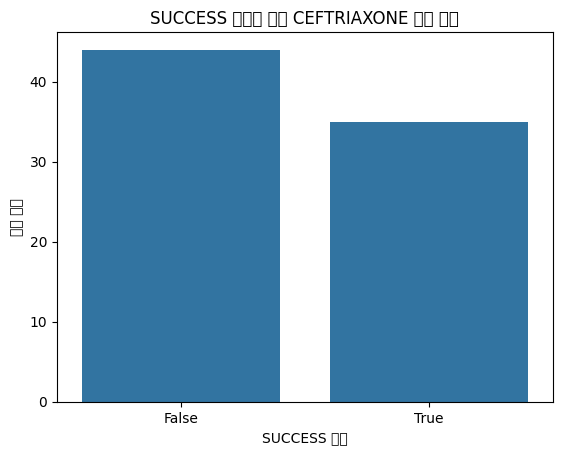

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 49324 (\N{HANGUL SYLLABLE SA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 50857 (\N{HANGUL SYLLABLE YONG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 48712 (\N{HANGUL SYLLABLE BIN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 46020 (\N{HANGUL SYLLABLE DO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 50668 (\N{HANGUL SYLLABLE YEO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/I

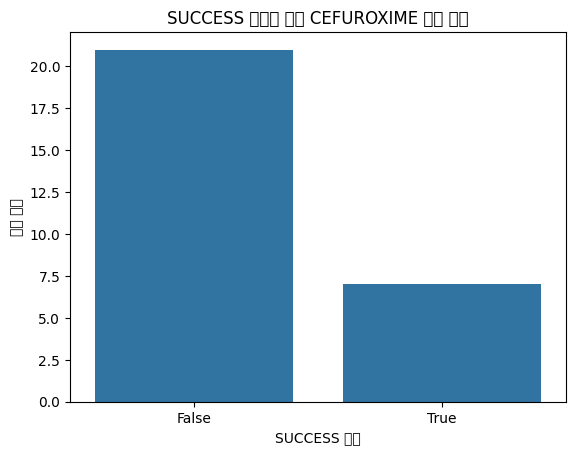

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 49324 (\N{HANGUL SYLLABLE SA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 50857 (\N{HANGUL SYLLABLE YONG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 48712 (\N{HANGUL SYLLABLE BIN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 46020 (\N{HANGUL SYLLABLE DO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 50668 (\N{HANGUL SYLLABLE YEO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/I

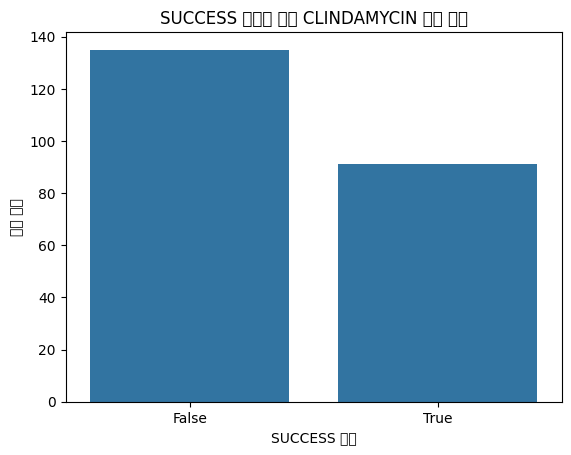

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 49324 (\N{HANGUL SYLLABLE SA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 50857 (\N{HANGUL SYLLABLE YONG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 48712 (\N{HANGUL SYLLABLE BIN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 46020 (\N{HANGUL SYLLABLE DO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 50668 (\N{HANGUL SYLLABLE YEO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/I

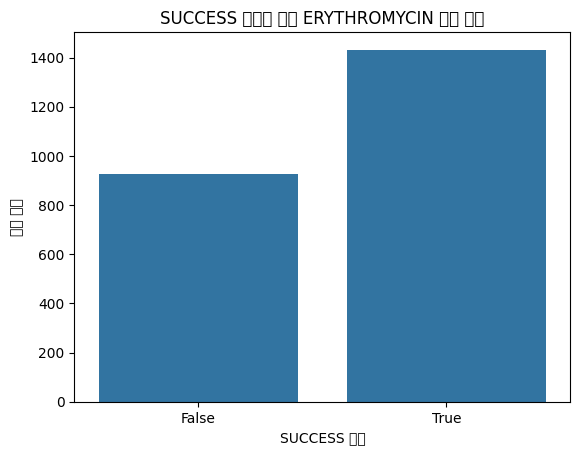

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 49324 (\N{HANGUL SYLLABLE SA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 50857 (\N{HANGUL SYLLABLE YONG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 48712 (\N{HANGUL SYLLABLE BIN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 46020 (\N{HANGUL SYLLABLE DO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 50668 (\N{HANGUL SYLLABLE YEO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/I

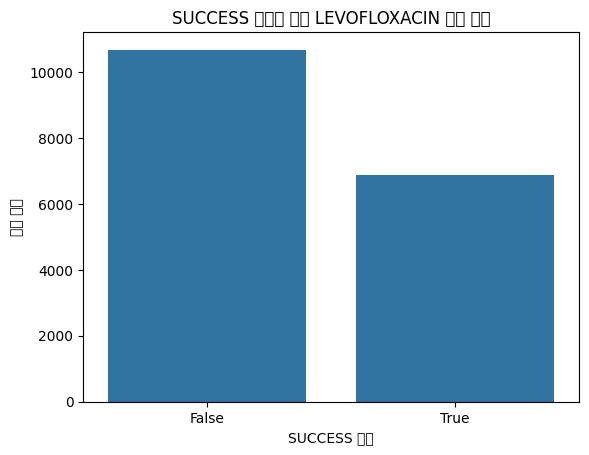

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 49324 (\N{HANGUL SYLLABLE SA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 50857 (\N{HANGUL SYLLABLE YONG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 48712 (\N{HANGUL SYLLABLE BIN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 46020 (\N{HANGUL SYLLABLE DO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 50668 (\N{HANGUL SYLLABLE YEO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/I

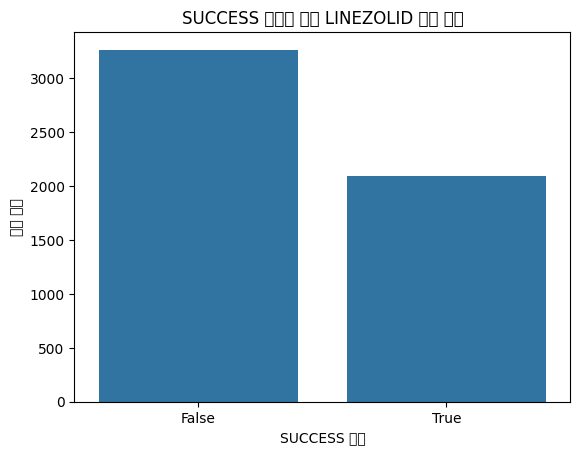

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 49324 (\N{HANGUL SYLLABLE SA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 50857 (\N{HANGUL SYLLABLE YONG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 48712 (\N{HANGUL SYLLABLE BIN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 46020 (\N{HANGUL SYLLABLE DO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 50668 (\N{HANGUL SYLLABLE YEO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/I

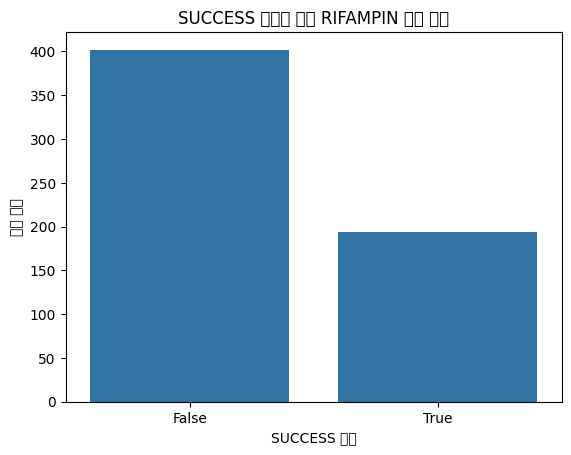

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# 항생제 사용 빈도 시각화
for drug in target_antibiotics:
    # 필터링된 데이터 생성
    filtered_data = features[features['DRUG_NAME_GENERIC'] == drug]
    usage_summary = filtered_data.groupby('SUCCESS')['DRUG_NAME_GENERIC'].count().reset_index()
    usage_summary.rename(columns={'DRUG_NAME_GENERIC': 'COUNT'}, inplace=True)

    # 시각화
    sns.barplot(data=usage_summary, x='SUCCESS', y='COUNT')
    plt.title(f"SUCCESS 여부에 따른 {drug} 사용 빈도")
    plt.xlabel("SUCCESS 여부")
    plt.ylabel("사용 빈도")
    plt.show()


통계검정

In [ ]:
from sklearn.preprocessing import OneHotEncoder

# DRUG_NAME_GENERIC 원-핫 인코딩
encoder = OneHotEncoder(sparse_output=False)
antibiotic_encoded = encoder.fit_transform(features[['DRUG_NAME_GENERIC']])

# 원-핫 인코딩된 데이터를 데이터프레임으로 변환
antibiotic_df = pd.DataFrame(antibiotic_encoded, columns=encoder.get_feature_names_out(['DRUG_NAME_GENERIC']))

# 원래 데이터프레임과 병합
features = pd.concat([features.reset_index(drop=True), antibiotic_df], axis=1)

# 결과 확인
print(features.head())

   SUBJECT_ID  ITEMID  INITIAL_VALUE  FINAL_VALUE  CHANGE  SUCCESS  \
0           2   51144            0.0          1.0     1.0     True   
1           2   51256          100.0         70.0   -30.0     True   
2           2   51265            5.0        302.0   297.0     True   
3           3   51144            2.0          0.0    -2.0     True   
4           3   51256           77.6         76.9    -0.7    False   

   HOSPITAL_EXPIRE_FLAG  SURVIVAL DRUG_NAME_GENERIC  \
0                     0      True               NaN   
1                     0      True               NaN   
2                     0      True               NaN   
3                     0      True               NaN   
4                     0      True               NaN   

   DRUG_NAME_GENERIC_AMPICILLIN  ...  DRUG_NAME_GENERIC_CEFTRIAXONE  \
0                           0.0  ...                            0.0   
1                           0.0  ...                            0.0   
2                           0.0  ..

# **카이제곱 검정**
항생제 사용과 치료 성공 여부 간의 독립성을 검증:

In [ ]:
from scipy.stats import chi2_contingency

# SUCCESS 여부와 항생제 사용 빈도
contingency_table = pd.crosstab(features['SUCCESS'], features['DRUG_NAME_GENERIC'])
chi2, p, dof, expected = chi2_contingency(contingency_table)

# 결과 출력
print(f"카이제곱 검정 결과: chi2={chi2}, p={p}")
if p < 0.05:
    print("항생제 사용과 치료 성공 간의 관계가 유의미합니다.")
else:
    print("항생제 사용과 치료 성공 간의 관계가 유의미하지 않습니다.")


카이제곱 검정 결과: chi2=435.4865866342416, p=1.762831705349424e-86
항생제 사용과 치료 성공 간의 관계가 유의미합니다.


# **t-검정**
치료 성공 여부에 따라 감염 지표 변화량(CHANGE)의 평균 차이를 검증:

In [ ]:
from scipy.stats import ttest_ind

success_change = features[features['SUCCESS'] == True]['CHANGE']
failure_change = features[features['SUCCESS'] == False]['CHANGE']

t_stat, p_value = ttest_ind(success_change, failure_change, nan_policy='omit')

# 결과 출력
print(f"t-검정 결과: t_stat={t_stat}, p_value={p_value}")
if p_value < 0.05:
    print("SUCCESS 여부에 따른 감염 지표 변화량의 평균 차이가 유의미합니다.")
else:
    print("SUCCESS 여부에 따른 감염 지표 변화량의 평균 차이가 유의미하지 않습니다.")


t-검정 결과: t_stat=-1.6704168789514653, p_value=0.09483848820134139
SUCCESS 여부에 따른 감염 지표 변화량의 평균 차이가 유의미하지 않습니다.


In [ ]:
# Cohen's d 계산
def cohen_d(x, y):
    return (x.mean() - y.mean()) / (np.sqrt((x.std()**2 + y.std()**2) / 2))

effect_size = cohen_d(success_change, failure_change)
print(f"Cohen's d (효과 크기): {effect_size}")

Cohen's d (효과 크기): -0.007620663954661731


In [ ]:
from scipy.stats import ttest_ind

# 항생제 목록
target_antibiotics = features['DRUG_NAME_GENERIC'].unique()

# 항생제별 t-검정 결과 저장
t_test_results = []

for drug in target_antibiotics:
    # 해당 항생제를 사용한 데이터 필터링
    drug_data = features[features['DRUG_NAME_GENERIC'] == drug]

    # SUCCESS=True와 SUCCESS=False의 CHANGE 값 추출
    success_group = drug_data[drug_data['SUCCESS'] == True]['CHANGE']
    failure_group = drug_data[drug_data['SUCCESS'] == False]['CHANGE']

    # t-검정 수행
    t_stat, p_value = ttest_ind(success_group, failure_group, nan_policy='omit')

    # 결과 저장
    t_test_results.append({'DRUG_NAME_GENERIC': drug, 't_stat': t_stat, 'p_value': p_value})

# 결과를 데이터프레임으로 정리
t_test_df = pd.DataFrame(t_test_results)

# p-value 기준 정렬
t_test_df.sort_values(by='p_value', inplace=True)

# 결과 출력
print(t_test_df)


   DRUG_NAME_GENERIC     t_stat       p_value
3       ERYTHROMYCIN -17.875945  4.004132e-67
4           RIFAMPIN   3.785209  1.692247e-04
6        CLINDAMYCIN  -2.868488  4.518490e-03
7        CEFTRIAXONE  -2.453442  1.644046e-02
12        VANCOMYCIN  -1.822925  9.830602e-02
1       LEVOFLOXACIN  -1.272601  2.031765e-01
9           CEFEPIME  -1.192733  2.462768e-01
10      TETRACYCLINE  -1.085581  2.894173e-01
8         CEFUROXIME  -0.937226  3.572671e-01
2          LINEZOLID  -0.882907  3.773263e-01
11         CEFAZOLIN  -0.594558  5.667831e-01
5         AMPICILLIN  -0.053829  9.570868e-01
0                NaN        NaN           NaN


/usr/local/lib/python3.10/dist-packages/scipy/stats/_axis_nan_policy.py:531: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  res = hypotest_fun_out(*samples, **kwds)


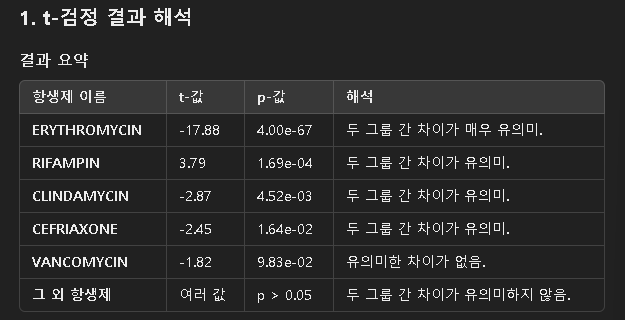

In [ ]:
# Cohen's d 계산 함수
def cohen_d(x, y):
    return (x.mean() - y.mean()) / np.sqrt((x.std()**2 + y.std()**2) / 2)

# 효과 크기 계산 및 추가
t_test_df['effect_size'] = t_test_df.apply(
    lambda row: cohen_d(
        features[(features['DRUG_NAME_GENERIC'] == row['DRUG_NAME_GENERIC']) & (features['SUCCESS'] == True)]['CHANGE'],
        features[(features['DRUG_NAME_GENERIC'] == row['DRUG_NAME_GENERIC']) & (features['SUCCESS'] == False)]['CHANGE']
    ), axis=1


print(t_test_df)


   DRUG_NAME_GENERIC     t_stat       p_value  effect_size
3       ERYTHROMYCIN -17.875945  4.004132e-67    -0.694934
4           RIFAMPIN   3.785209  1.692247e-04     0.359542
6        CLINDAMYCIN  -2.868488  4.518490e-03    -0.412607
7        CEFTRIAXONE  -2.453442  1.644046e-02    -0.554024
12        VANCOMYCIN  -1.822925  9.830602e-02    -1.537226
1       LEVOFLOXACIN  -1.272601  2.031765e-01    -0.021604
9           CEFEPIME  -1.192733  2.462768e-01    -0.688368
10      TETRACYCLINE  -1.085581  2.894173e-01    -0.462439
8         CEFUROXIME  -0.937226  3.572671e-01    -0.507351
2          LINEZOLID  -0.882907  3.773263e-01    -0.027175
11         CEFAZOLIN  -0.594558  5.667831e-01    -0.379209
5         AMPICILLIN  -0.053829  9.570868e-01    -0.004515
0                NaN        NaN           NaN          NaN


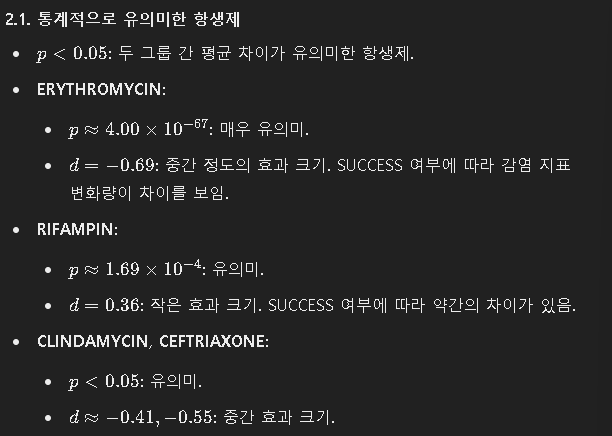


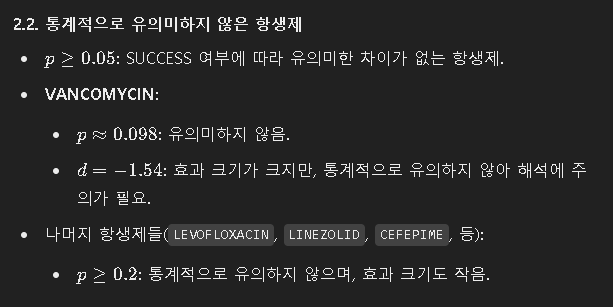

 통계적으로 유의미한 항생제
>ERYTHROMYCIN, RIFAMPIN, CLINDAMYCIN, CEFTRIAXONE
- SUCCESS 여부에 따라 감염 지표 변화량이 유의미하게 다르며, 치료 성공에 중요한 역할을 할 가능성이 있음.
- 효과 크기가 중간 정도로, SUCCESS 여부와 연관성이 크다고 볼 수 있음.


 통계적으로 유의미하지 않은 항생제
>VANCOMYCIN 및 나머지 항생제
- 통계적으로 유의미하지 않음.
- 치료 성공 여부와 감염 지표 변화량의 차이가 크지 않음을 의미.
- 효과 크기가 큰 항생제는 추가 검토 필요 (예: VANCOMYCIN).

In [ ]:
for drug in target_antibiotics:
    drug_data = features[features['DRUG_NAME_GENERIC'] == drug]
    print(f"{drug} 데이터 분포:\n", drug_data['CHANGE'].describe())

nan 데이터 분포:
 count    0.0
mean     NaN
std      NaN
min      NaN
25%      NaN
50%      NaN
75%      NaN
max      NaN
Name: CHANGE, dtype: float64
LEVOFLOXACIN 데이터 분포:
 count    17506.000000
mean        -0.310144
std        285.781645
min      -6193.000000
25%        -12.000000
50%          0.000000
75%         12.300000
max       5926.000000
Name: CHANGE, dtype: float64
LINEZOLID 데이터 분포:
 count     5349.000000
mean         0.739781
std        398.338486
min      -6118.000000
25%        -18.000000
50%          0.000000
75%         12.300000
max      14824.000000
Name: CHANGE, dtype: float64
ERYTHROMYCIN 데이터 분포:
 count    2360.000000
mean        4.570869
std        58.228078
min      -354.000000
25%       -18.000000
50%         0.000000
75%        23.700000
max       743.000000
Name: CHANGE, dtype: float64
RIFAMPIN 데이터 분포:
 count    594.000000
mean     -15.744276
std       98.917090
min     -469.000000
25%      -19.000000
50%        0.000000
75%       14.000000
max      330.000000
Name: 

** 유의미한 항생제 추가 분석과 임상적 적용 가능성 평가**

<ipython-input-71-eb996a5ce9ce>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=drug_data, x='SUCCESS', y='CHANGE', palette='Set2')
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 44048 (\N{HANGUL SYLLABLE GAM}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 50684 (\N{HANGUL SYLLABLE YEOM}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 51648 (\N{HANGUL SYLLABLE JI}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 54364 (\N{HANGUL SYLLABLE PYO}) missing fro

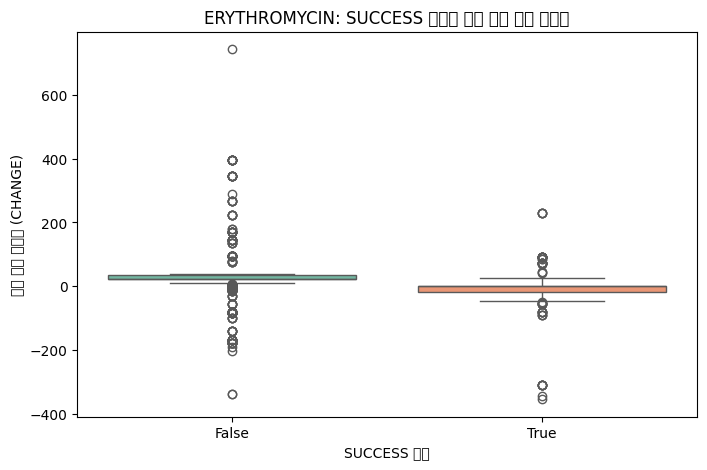

<ipython-input-71-eb996a5ce9ce>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=drug_data, x='SUCCESS', y='CHANGE', palette='Set2')
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 44048 (\N{HANGUL SYLLABLE GAM}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 50684 (\N{HANGUL SYLLABLE YEOM}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 51648 (\N{HANGUL SYLLABLE JI}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 54364 (\N{HANGUL SYLLABLE PYO}) missing fro

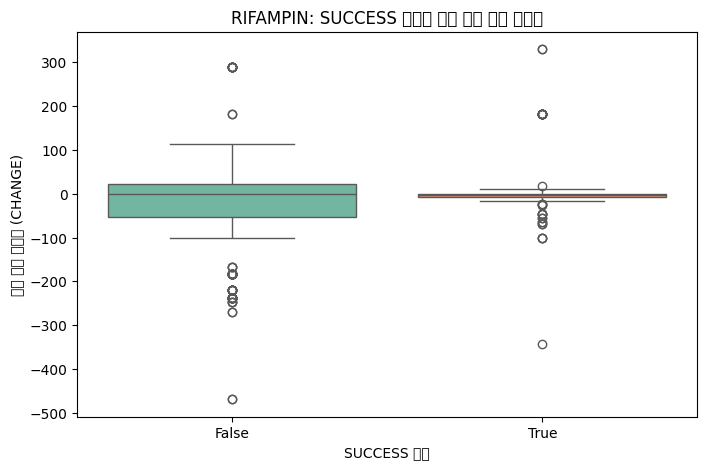

<ipython-input-71-eb996a5ce9ce>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=drug_data, x='SUCCESS', y='CHANGE', palette='Set2')
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 44048 (\N{HANGUL SYLLABLE GAM}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 50684 (\N{HANGUL SYLLABLE YEOM}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 51648 (\N{HANGUL SYLLABLE JI}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 54364 (\N{HANGUL SYLLABLE PYO}) missing fro

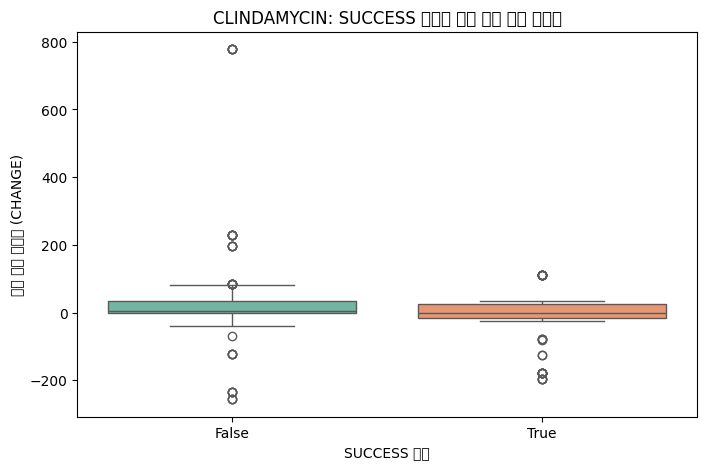

<ipython-input-71-eb996a5ce9ce>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=drug_data, x='SUCCESS', y='CHANGE', palette='Set2')
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 44048 (\N{HANGUL SYLLABLE GAM}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 50684 (\N{HANGUL SYLLABLE YEOM}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 51648 (\N{HANGUL SYLLABLE JI}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 54364 (\N{HANGUL SYLLABLE PYO}) missing fro

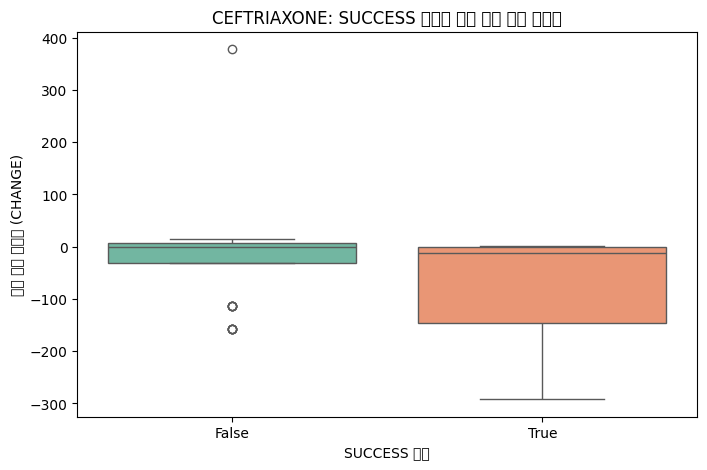

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# 유의미한 항생제 목록
significant_antibiotics = ['ERYTHROMYCIN', 'RIFAMPIN', 'CLINDAMYCIN', 'CEFTRIAXONE']

# 시각화: SUCCESS 여부에 따른 감염 지표 변화량
for drug in significant_antibiotics:
    drug_data = features[features['DRUG_NAME_GENERIC'] == drug]

    # Boxplot 생성
    plt.figure(figsize=(8, 5))
    sns.boxplot(data=drug_data, x='SUCCESS', y='CHANGE', palette='Set2')
    plt.title(f"{drug}: SUCCESS 여부에 따른 감염 지표 변화량")
    plt.xlabel("SUCCESS 여부")
    plt.ylabel("감염 지표 변화량 (CHANGE)")
    plt.show()


 SUCCESS 여부와 감염 지표 변화량의 상관관계 분석

In [ ]:
from scipy.stats import pearsonr
import numpy as np

# 상관관계 분석 결과 저장
correlation_results = []

for drug in significant_antibiotics:
    drug_data = features[features['DRUG_NAME_GENERIC'] == drug]

    # SUCCESS와 CHANGE 데이터 준비
    success_values = drug_data['SUCCESS'].astype(int)  # SUCCESS를 정수형(0/1)으로 변환
    change_values = drug_data['CHANGE']

    # NaN 및 inf 값 제거
    valid_indices = ~np.isnan(change_values) & ~np.isinf(change_values)
    success_values = success_values[valid_indices]
    change_values = change_values[valid_indices]

    # Pearson 상관계수 계산
    if len(success_values) > 1:  # 유효한 데이터가 2개 이상인지 확인
        corr, p_value = pearsonr(success_values, change_values)
        correlation_results.append({'DRUG_NAME_GENERIC': drug, 'correlation': corr, 'p_value': p_value})
    else:
        correlation_results.append({'DRUG_NAME_GENERIC': drug, 'correlation': None, 'p_value': None})

# 결과 데이터프레임으로 정리
correlation_df = pd.DataFrame(correlation_results)

# 상관관계 결과 출력
print("SUCCESS 여부와 감염 지표 변화량의 상관관계:\n", correlation_df)


SUCCESS 여부와 감염 지표 변화량의 상관관계:
   DRUG_NAME_GENERIC  correlation       p_value
0      ERYTHROMYCIN    -0.345462  4.004132e-67
1          RIFAMPIN     0.153722  1.692247e-04
2       CLINDAMYCIN    -0.188233  4.518490e-03
3       CEFTRIAXONE    -0.270905  1.644046e-02


# **전반적인 인사이트**

 - ERYTHROMYCIN과 SUCCESS 여부는 중간 정도의 음의 상관관계를 보이며, 통계적으로 매우 유의미
 - SUCCESS=True일 때 감염 지표 변화량이 적은 경향을 보입니다.


RIFAMPIN
- 양의 상관관계가 나타나지만, 상관계수가 작아서 약한 관계만 보임

음의 상관관계를 보이는 항생제
- CLINDAMYCIN과 CEFTRIAXONE도 SUCCESS 여부와 음의 상관관계를 보여, SUCCESS=True일 때 감염 지표 변화량이 감소하는 경향을 나타냅니다.

In [ ]:
# 임상적 적용 가능성 평가: 효과 크기와 통계적 유의미성을 통합
significant_analysis = t_test_df[t_test_df['p_value'] < 0.05].copy()
significant_analysis['clinical_significance'] = significant_analysis['effect_size'].apply(
    lambda d: "High" if abs(d) >= 0.5 else "Moderate" if abs(d) >= 0.2 else "Low"
)

# 결과 출력
print("유의미한 항생제의 임상적 적용 가능성 평가:\n", significant_analysis[['DRUG_NAME_GENERIC', 'effect_size', 'clinical_significance']])


유의미한 항생제의 임상적 적용 가능성 평가:
   DRUG_NAME_GENERIC  effect_size clinical_significance
3      ERYTHROMYCIN    -0.694934                  High
4          RIFAMPIN     0.359542              Moderate
6       CLINDAMYCIN    -0.412607              Moderate
7       CEFTRIAXONE    -0.554024                  High
